### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Dataset

In [2]:
df=pd.read_csv('auto-mpg.csv')

### EDA

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
df.shape

(398, 9)

In [5]:
df.drop(['car name','horsepower'],axis=1,inplace=True)

In [6]:
df.head()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
0,18.0,8,307.0,3504,12.0,70,1
1,15.0,8,350.0,3693,11.5,70,1
2,18.0,8,318.0,3436,11.0,70,1
3,16.0,8,304.0,3433,12.0,70,1
4,17.0,8,302.0,3449,10.5,70,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model year    398 non-null    int64  
 6   origin        398 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 21.9 KB


In [8]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [9]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


<AxesSubplot:ylabel='Frequency'>

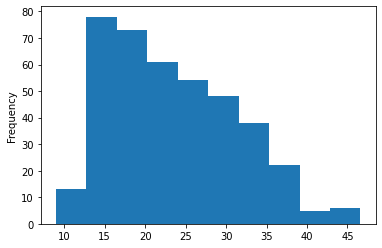

In [10]:
df['mpg'].plot(kind='hist')

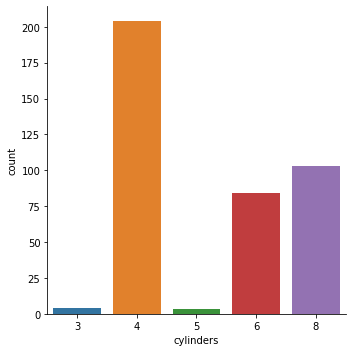

In [11]:
sns.catplot(x='cylinders',data=df,kind='count')

<AxesSubplot:ylabel='Frequency'>

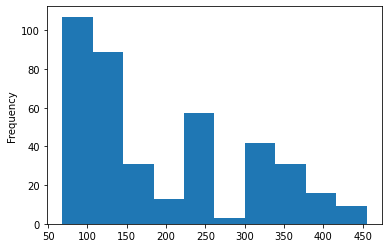

In [12]:
df['displacement'].plot(kind='hist')

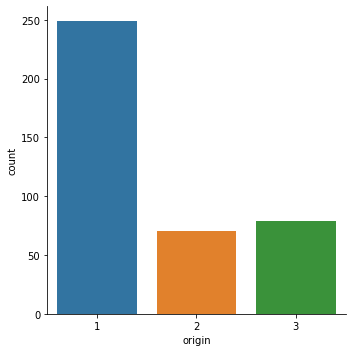

In [13]:
sns.catplot(x='origin',data=df,kind='count')

<AxesSubplot:ylabel='Frequency'>

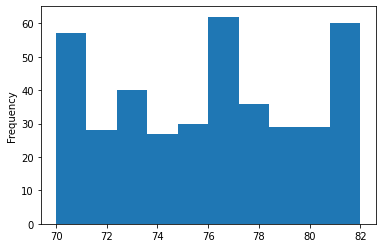

In [14]:
df['model year'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

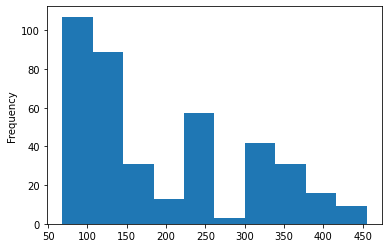

In [15]:
df['displacement'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

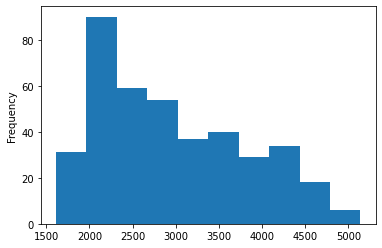

In [16]:
df['weight'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

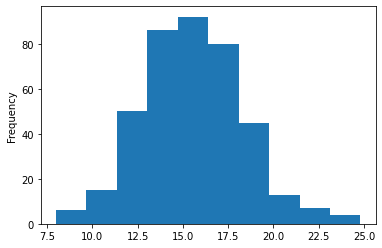

In [17]:
df['acceleration'].plot(kind='hist')

In [18]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'weight', 'acceleration',
       'model year', 'origin'],
      dtype='object')

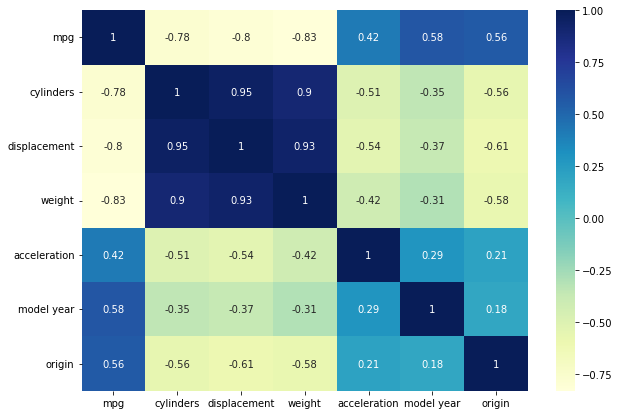

In [19]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model year    398 non-null    int64  
 6   origin        398 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 21.9 KB


### Separating dependant and independant variables

In [21]:
X=df.drop('mpg',axis=1)
y=df.mpg

### Train _test Split

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### Feature scaling

In [23]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

### Xgboost 

In [24]:
from xgboost import XGBRegressor
xr=XGBRegressor()
xr.fit(X_train,y_train)
y_hat=xr.predict(X_test)
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print("MSE:",mean_squared_error(y_test,y_hat))
print("MAE:",mean_absolute_error(y_test,y_hat))
print("R2-score:",r2_score(y_test,y_hat))

MSE: 9.847294300281543
MAE: 2.3020229506492615
R2-score: 0.8168505555980435


### Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
y_hat2=lr.predict(X_test)
print("MSE:",mean_squared_error(y_test,y_hat2))
print("MAE:",mean_absolute_error(y_test,y_hat2))
print("R2-score:",r2_score(y_test,y_hat2))

MSE: 7.946562174000813
MAE: 2.202916494623653
R2-score: 0.8522021986250334


### Random Forest 

In [26]:
from sklearn.ensemble import RandomForestRegressor
rr=RandomForestRegressor()
rr.fit(X_train,y_train)
y_hat3=rr.predict(X_test)
print("MSE:",mean_squared_error(y_test,y_hat3))
print("MAE:",mean_absolute_error(y_test,y_hat3))
print("R2-score:",r2_score(y_test,y_hat3))

MSE: 5.172329449999998
MAE: 1.6767000000000003
R2-score: 0.9038000453582167


### Decision Tree

In [27]:
from sklearn.tree import DecisionTreeRegressor
dr=DecisionTreeRegressor()
dr.fit(X_train,y_train)
y_hat4=dr.predict(X_test)
print("MSE:",mean_squared_error(y_test,y_hat4))
print("MAE:",mean_absolute_error(y_test,y_hat4))
print("R2-score:",r2_score(y_test,y_hat4))

MSE: 12.203624999999999
MAE: 2.52875
R2-score: 0.7730252523908093


### We are going to use random forest regressor